In [2]:
import numpy as np
import pandas as pd
from scipy.special import ndtr
from scipy.stats import norm, ncx2
from scipy.optimize import minimize
from numpy.polynomial.hermite import hermfit, hermval, hermder
import matplotlib.pyplot as plt
from typing import Union, List
import seaborn as sns


In [3]:
def calculate_zero_coupon_price(time_to_maturity: Union[float, np.ndarray],
                                initial_short_rate: float,
                                kappa: float,
                                theta: float,
                                beta: float):
    
    y_infty = theta * beta / kappa - beta**2 / (2 * kappa**2)
    
    b = 1 / kappa * (1 - np.exp(-kappa * time_to_maturity))
    a = y_infty * (time_to_maturity  - b) + beta**2 / (4 * kappa) * b**2
    
    return np.exp(- a - b * initial_short_rate)


import numpy as np
def simulate_vasicek(initial_short_rate: float, kappa: float, theta: float,
                     beta: float, horizon: float, 
                     dt: float=1.0/12, num_sim: int=10000):
    """
    simulates short rate processes in a vasicek setting until a given horizon 
    
    Parameters

    ----------
    
    initial_short_rate:
        initial short rate
    kappa: 
        speed of mean reversion.
    theta: 
        long term mean of the short rate.
    dt:
        increments in time
    horizon:
        time until maturity/expiry (horizon).
    num_sim:
        number of simulations.
    """
    std_rates = np.sqrt(beta**2 / (2 * kappa) * (1 - np.exp(-2 * kappa * dt)))
    
    num_periods = int(horizon / dt)
    short_rates = np.empty((num_sim, num_periods + 1))
    short_rates[:, 0] = initial_short_rate
    
    error_terms = np.random.normal(scale=std_rates, size=(num_sim, num_periods))
    
    for i in range(1, num_periods + 1): 
        
        short_rates[:, i] = theta + (short_rates[:, i - 1] - theta) * np.exp(-kappa * dt) + error_terms[:, i - 1]

    return short_rates

short_rate = 0.03
theta = 0.03
kappa = 1.0
beta = 0.02
dt = 1/52
time_points = np.arange(0, 5.01, dt)
short_rates_q = simulate_vasicek(short_rate, kappa=kappa, theta=theta, beta=beta, horizon=5, dt=dt, num_sim=1)
horizon=5

zero_bond_price = calculate_zero_coupon_price(time_to_maturity=horizon,
                                              initial_short_rate=short_rates_q,
                                              kappa=kappa,
                                              theta=theta,
                                              beta=beta)

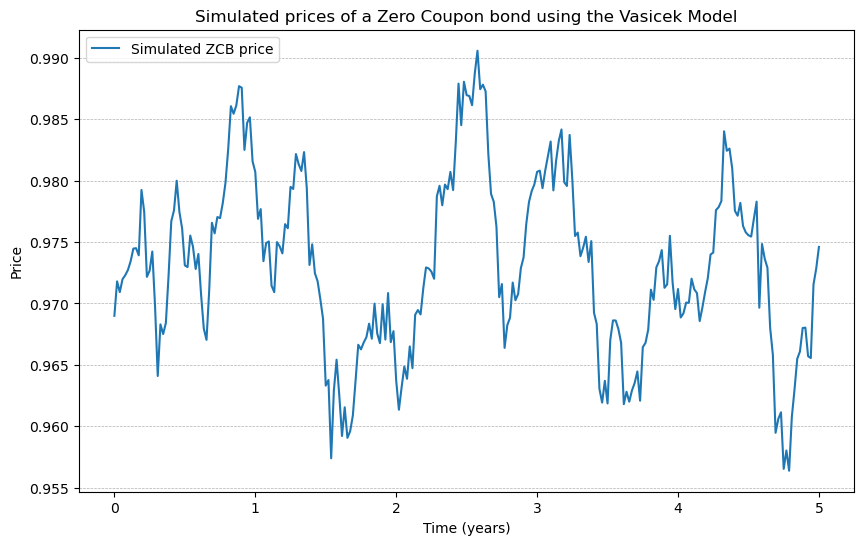

In [5]:
num_simulations = zero_bond_price.shape[0]


plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for i in range(num_simulations):
    plt.plot(time_points, zero_bond_price[i, :], label= "Simulated ZCB price", color ='tab:blue')

plt.xlabel('Time (years)')
plt.ylabel('Price')
plt.title('Simulated prices of a Zero Coupon bond using the Vasicek Model')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.legend(loc='upper left')
plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/zcb_1_sim.png")
plt.show()
plt.close()

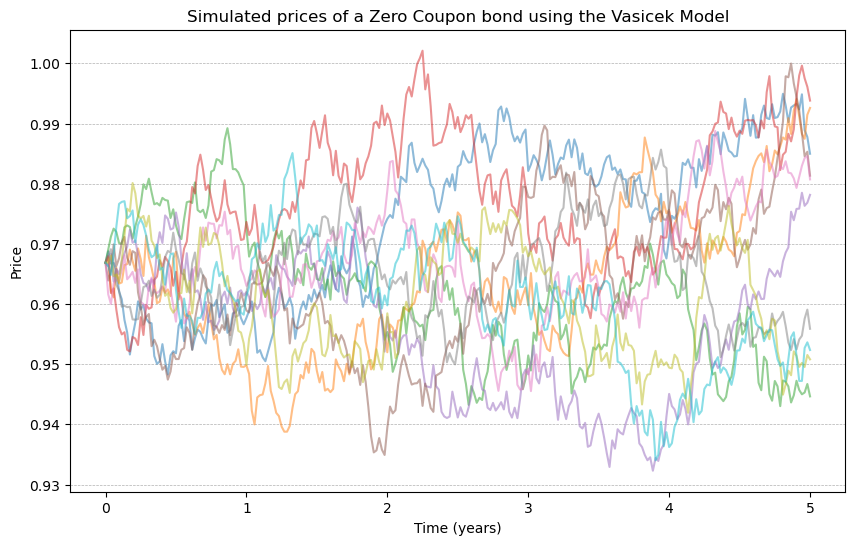

In [4]:
np.random.seed(13)
short_rates_q = simulate_vasicek(short_rate, kappa=kappa, theta=theta, beta=beta, horizon=5, dt=dt, num_sim=10)
horizon=10

zero_bond_price = calculate_zero_coupon_price(time_to_maturity=horizon,
                                              initial_short_rate=short_rates_q,
                                              kappa=kappa,
                                              theta=theta,
                                              beta=beta)

num_simulations = zero_bond_price.shape[0]

colors = sns.color_palette("Set3", num_simulations)

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for i in range(num_simulations):
    plt.plot(time_points, zero_bond_price[i, :], alpha =0.5)

plt.xlabel('Time (years)')
plt.ylabel('Price')
plt.title('Simulated prices of a Zero Coupon bond using the Vasicek Model')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/zcb_10_sim.png")
plt.show()
plt.close()

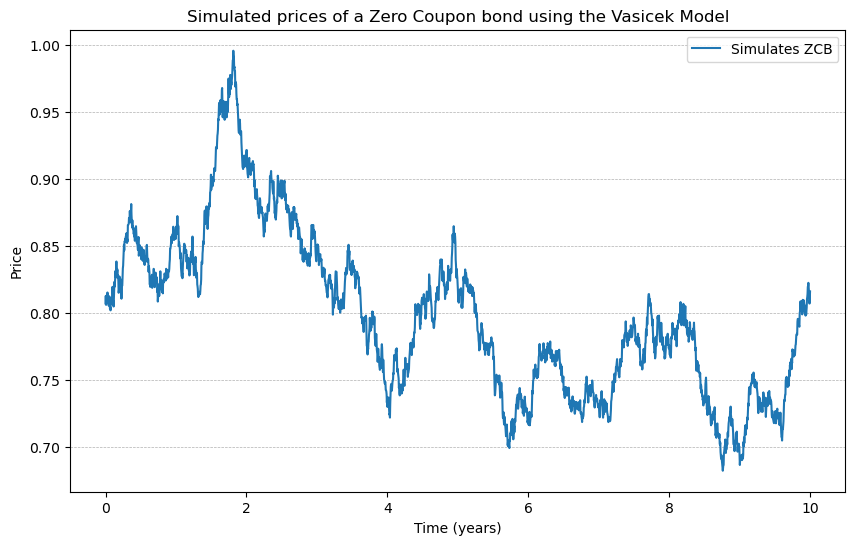

In [5]:
##USE THIS
np.random.seed(30)
def calculate_zero_coupon_price(time_to_maturity: Union[float, np.ndarray],
                                initial_short_rate: float,
                                kappa: float,
                                theta: float,
                                beta: float):
    
    y_infty = theta * beta / kappa - beta**2 / (2 * kappa**2)
    
    b = 1 / kappa * (1 - np.exp(-kappa * time_to_maturity))
    a = y_infty * (time_to_maturity  - b) + beta**2 / (4 * kappa) * b**2
    
    return np.exp(- a - b * initial_short_rate)

def simulate_vasicek(r0, a, b, sigma, T, dt):
    """
    Simulate interest rate using the Vasicek model.
    
    Parameters:
        r0 (float): Initial interest rate
        a (float): Speed of mean reversion
        b (float): Long-term mean interest rate
        sigma (float): Volatility of interest rate
        T (int): Time horizon for the simulation
        dt (float): Time step size

    Returns:
        np.array: Simulated interest rates over time
    """
    N = int(T / dt)
    t = np.linspace(0, T, N)
    rates = np.zeros(N)
    rates[0] = r0

    for i in range(1, N):
        dw = np.random.normal(0, np.sqrt(dt))
        rates[i] = rates[i-1] + a * (b - rates[i-1]) * dt + sigma * dw

    return t, rates

r0 = 0.05  
a = 0.2    
b = 0.03   
sigma = 0.02 
T = 10     
dt = 1/252  
t, rates = simulate_vasicek(r0, a, b, sigma, T, dt)

short_rate = 0.03
theta = 0.03
kappa = 0.2
beta = 0.02
dt = 1/52

horizon=10

zero_bond_price = calculate_zero_coupon_price(time_to_maturity=T,
                                              initial_short_rate=rates,
                                              kappa=kappa,
                                              theta=theta,
                                              beta=beta)

num_simulations = zero_bond_price.shape[0]


plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

plt.plot(t, zero_bond_price,color ='tab:blue', label="Simulates ZCB")

plt.xlabel('Time (years)')
plt.ylabel('Price')
plt.title('Simulated prices of a Zero Coupon bond using the Vasicek Model')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.legend()
#plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/zcb_1_sim.png")
plt.show()
plt.close()